# EDA for price data

In [1]:
# import packages

import pandas as pd
import numpy as np

from dotenv import load_dotenv
import os
from sqlalchemy import create_engine
import pandas as pd

### Getting the data

In [2]:
# Load environment variables from .env file
load_dotenv()

# Get database connection parameters from environment variables
db_name = os.getenv('DB_NAME')
db_user = os.getenv('DB_USER')
db_password = os.getenv('DB_PASSWORD')
db_host = os.getenv('DB_HOST')
db_port = os.getenv('DB_PORT')

# Create the database URL
db_url = f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"

# Create an engine
engine = create_engine(db_url)

# Define your query
query = 'SELECT * FROM "01_bronze"."raw_market_day_ahead_prices"'

# Execute the query and load the data into a pandas DataFrame
df_check = pd.read_sql(query, engine)

# Display the DataFrame
print(df_check.head())

             start_date             end_date   
0  Jan 1, 2018 12:00 AM  Jan 1, 2018 1:00 AM  \
1   Jan 1, 2018 1:00 AM  Jan 1, 2018 2:00 AM   
2   Jan 1, 2018 2:00 AM  Jan 1, 2018 3:00 AM   
3   Jan 1, 2018 3:00 AM  Jan 1, 2018 4:00 AM   
4   Jan 1, 2018 4:00 AM  Jan 1, 2018 5:00 AM   

  germany/luxembourg_[€/mwh]_original_resolutions   
0                                            None  \
1                                            None   
2                                            None   
3                                            None   
4                                            None   

  ∅_de/lu_neighbours_[€/mwh]_original_resolutions   
0                                            None  \
1                                            None   
2                                            None   
3                                            None   
4                                            None   

   belgium_[€/mwh]_original_resolutions   
0                             

### Overview of data

In [3]:
df_check.head()

,start_date,end_date,germany/luxembourg_[€/mwh]_original_resolutions,∅_de/lu_neighbours_[€/mwh]_original_resolutions,belgium_[€/mwh]_original_resolutions,denmark_1_[€/mwh]_original_resolutions,denmark_2_[€/mwh]_original_resolutions,france_[€/mwh]_original_resolutions,netherlands_[€/mwh]_original_resolutions,norway_2_[€/mwh]_original_resolutions,austria_[€/mwh]_original_resolutions,poland_[€/mwh]_original_resolutions,sweden_4_[€/mwh]_original_resolutions,switzerland_[€/mwh]_original_resolutions,czech_republic_[€/mwh]_original_resolutions,de/at/lu_[€/mwh]_original_resolutions,northern_italy_[€/mwh]_original_resolutions,slovenia_[€/mwh]_original_resolutions,hungary_[€/mwh]_original_resolutions
0,"Jan 1, 2018 12:00 AM","Jan 1, 2018 1:00 AM",None,None,14.16,21.80,26.33,6.74,27.20,26.33,None,None,26.33,36.99,-10.0,-5.27,45.73,4.9,4.29
1,"Jan 1, 2018 1:00 AM","Jan 1, 2018 2:00 AM",None,None,4.74,26.43,26.43,4.74,27.30,26.43,None,None,26.43,31.08,-19.0,-29.99,44.16,3.0,0.22
2,"Jan 1, 2018 2:00 AM","Jan 1, 2018 3:00 AM",None,None,3.66,26.10,26.10,3.66,30.10,26.10,None,None,26.10,29.17,-20.1,-56.65,42.24,1.0,0.21
3,"Jan 1, 2018 3:00 AM","Jan 1, 2018 4:00 AM",None,None,1.26,24.70,24.70,1.26,20.87,24.70,None,None,24.70,21.96,-26.9,-63.14,39.29,1.0,0.07
4,"Jan 1, 2018 4:00 AM","Jan 1, 2018 5:00 AM",None,None,-20.10,24.74,24.74,-20.10,25.56,24.74,None,None,24.74,14.96,-27.5,-64.62,36.00,-42.5,-17.44


In [4]:
# We want only germany
price_germany = df_check.iloc[:, 0:3]

# Rename column
price_germany.rename(columns={'germany/luxembourg_[€/mwh]_original_resolutions' : 'Price_Germany[€/MWh]'}, inplace=True)
price_germany.head()

,start_date,end_date,Price_Germany[€/MWh]
0,"Jan 1, 2018 12:00 AM","Jan 1, 2018 1:00 AM",None
1,"Jan 1, 2018 1:00 AM","Jan 1, 2018 2:00 AM",None
2,"Jan 1, 2018 2:00 AM","Jan 1, 2018 3:00 AM",None
3,"Jan 1, 2018 3:00 AM","Jan 1, 2018 4:00 AM",None
4,"Jan 1, 2018 4:00 AM","Jan 1, 2018 5:00 AM",None


In [5]:
# transform date to datetime
price_germany['start_date'] = pd.to_datetime(price_germany['start_date'], format='%b %d, %Y %I:%M %p')
price_germany['end_date'] = pd.to_datetime(price_germany['end_date'], format='%b %d, %Y %I:%M %p')

price_germany.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83039 entries, 0 to 83038
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   start_date            83039 non-null  datetime64[ns]
 1   end_date              83039 non-null  datetime64[ns]
 2   Price_Germany[€/MWh]  50184 non-null  object        
dtypes: datetime64[ns](2), object(1)
memory usage: 1.9+ MB


In [6]:
# Check numerical variables
price_germany.describe()

,start_date,end_date
count,83039,83039
mean,2019-09-26 23:34:56.426980096,2019-09-27 00:34:46.022230272
min,2015-01-01 00:00:00,2015-01-01 01:00:00
25%,2017-05-15 00:30:00,2017-05-15 01:30:00
50%,2019-09-27 00:00:00,2019-09-27 01:00:00
75%,2022-02-07 22:30:00,2022-02-07 23:30:00
max,2024-06-21 23:00:00,2024-06-22 00:00:00


In [7]:
# Looking for nunique values
for col in price_germany.columns:
    print(f'{col} - {price_germany[col].nunique()}')

start_date - 83030
end_date - 83020
Price_Germany[€/MWh] - 19899


In [8]:
# Looking for unique values
for col in price_germany.columns:
    print(f'{col} - {price_germany[col].unique()}')

start_date - <DatetimeArray>
['2018-01-01 00:00:00', '2018-01-01 01:00:00', '2018-01-01 02:00:00',
 '2018-01-01 03:00:00', '2018-01-01 04:00:00', '2018-01-01 05:00:00',
 '2018-01-01 06:00:00', '2018-01-01 07:00:00', '2018-01-01 08:00:00',
 '2018-01-01 09:00:00',
 ...
 '2017-12-31 14:00:00', '2017-12-31 15:00:00', '2017-12-31 16:00:00',
 '2017-12-31 17:00:00', '2017-12-31 18:00:00', '2017-12-31 19:00:00',
 '2017-12-31 20:00:00', '2017-12-31 21:00:00', '2017-12-31 22:00:00',
 '2017-12-31 23:00:00']
Length: 83030, dtype: datetime64[ns]
end_date - <DatetimeArray>
['2018-01-01 01:00:00', '2018-01-01 02:00:00', '2018-01-01 03:00:00',
 '2018-01-01 04:00:00', '2018-01-01 05:00:00', '2018-01-01 06:00:00',
 '2018-01-01 07:00:00', '2018-01-01 08:00:00', '2018-01-01 09:00:00',
 '2018-01-01 10:00:00',
 ...
 '2017-12-31 15:00:00', '2017-12-31 16:00:00', '2017-12-31 17:00:00',
 '2017-12-31 18:00:00', '2017-12-31 19:00:00', '2017-12-31 20:00:00',
 '2017-12-31 21:00:00', '2017-12-31 22:00:00', '2017-12

In [9]:
# Missing values
price_germany.isnull().sum()

start_date                  0
end_date                    0
Price_Germany[€/MWh]    32855
dtype: int64

In [10]:
# Duplicates
price_germany.duplicated().sum()

3

**Data from 01.01.2019**

In [11]:
# We only want data from 01.01.2019
price_germany = price_germany[price_germany['start_date'].dt.year >= 2019]
price_germany.isnull().sum()

start_date              0
end_date                0
Price_Germany[€/MWh]    0
dtype: int64

In [12]:
price_germany.duplicated().sum()

0

***Result:***
- If we take the data from 01.01.2019, we will no longer have any NAs or duplicates

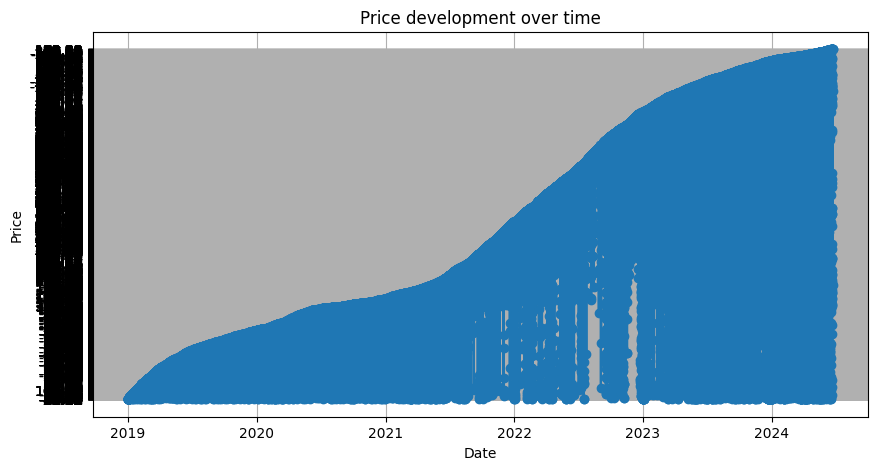

In [13]:
import matplotlib.pyplot as plt

# Sort data by date, if necessaryprice_germany = price_germany.sort_values('start_date')

# Create line plot
plt.figure(figsize=(10, 5))  # Adjust the size of the plot
plt.plot(price_germany['start_date'], price_germany['Price_Germany[€/MWh]'], marker='o', linestyle='-')  # 'o' and '-' for points and lines
plt.title('Price development over time')  
plt.xlabel('Date')  
plt.ylabel('Price')
plt.grid(True)  
plt.show()  

*It doesn't look good with so many data points. That's why only the average daily value is taken now.*

In [14]:
# Convert the strings into numerical values:

# Separate string by dots
def convert_to_numeric(x):
    try:
        return pd.to_numeric(x.split('.')[0])  # Takes the first value before the point
    except:
        return pd.np.nan  # SSets NaN if there is a problem

price_germany['Price_Germany[€/MWh]'] = price_germany['Price_Germany[€/MWh]'].apply(convert_to_numeric)


In [15]:
# Check the conversion
print(price_germany['Price_Germany[€/MWh]'].head())
print(price_germany['Price_Germany[€/MWh]'].describe())


8761    28
8762    10
8763    -4
8764    -9
8765    -7
Name: Price_Germany[€/MWh], dtype: int64
count    47975.000000
mean        95.893841
std        101.821946
min       -500.000000
25%         35.000000
50%         61.000000
75%        116.000000
max        871.000000
Name: Price_Germany[€/MWh], dtype: float64


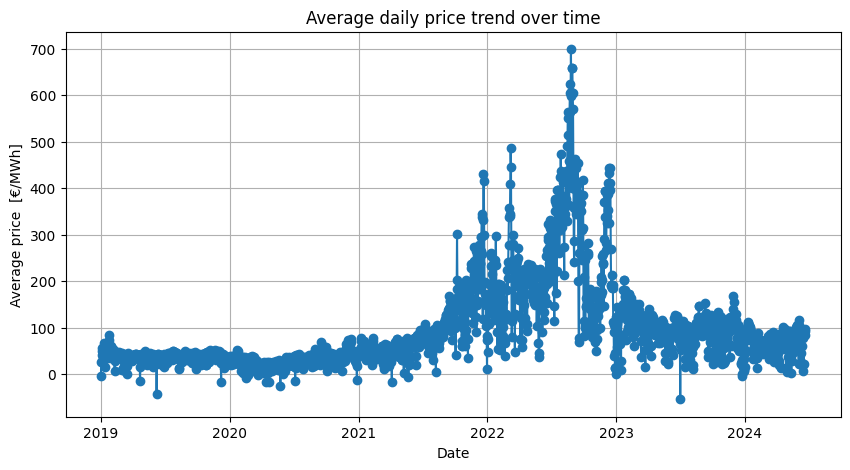

In [16]:
# Set the 'start_date' as an index if it is not yet set
price_germany.set_index('start_date', inplace=True)

# Resampling of the data to daily average values
daily_data = price_germany['Price_Germany[€/MWh]'].resample('D').mean()

# Visualize the resampled data
plt.figure(figsize=(10, 5))
plt.plot(daily_data.index, daily_data, marker='o', linestyle='-')
plt.title('Average daily price trend over time')
plt.xlabel('Date')
plt.ylabel('Average price  [€/MWh]')
plt.grid(True)
plt.show()


### Results
- The biggest spade is the energy crisis and the tense gas situation